In [1]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import statsmodels.api as sm
from matplotlib import animation
from IPython.display import HTML
import matplotlib
from scipy.interpolate import interp1d
from scipy import interpolate
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [14]:
def read_traj(index):
    
    global traj, xyz_pro, xyz_dppc, xyz_pro_fit_center, table_pro, table
    
    traj = md.load_xtc('run%d/sys_hydro_run_10.xtc'%index, top = 'initial_promb.pdb')
    xyz = traj.xyz
    top = traj.topology
    table, bonds = top.to_dataframe()
    
    table.loc[ table.chainID==0, 'resSeq'] = table['resSeq'][table.chainID==0].values + 815
    table.loc[ table.chainID==1, 'resSeq'] = table['resSeq'][table.chainID==1].values + 815
    table.loc[ table.chainID==2, 'resSeq'] = table['resSeq'][table.chainID==2].values + 815

    table.loc[ table.chainID==3, 'resSeq'] = table['resSeq'][table.chainID==3].values + 685
    table.loc[ table.chainID==4, 'resSeq'] = table['resSeq'][table.chainID==4].values + 685
    table.loc[ table.chainID==5, 'resSeq'] = table['resSeq'][table.chainID==5].values + 685
    
    table_pro =  table[table.chainID < 3]
    xyz_pro = xyz[:,table.chainID < 3,:]
    
    xyz_pro = deal_pbc()
    
    xyz_dppc = xyz[:,(table.resName == 'DPPC') ,:]
    table_pro_fit = table_pro[(table_pro.resSeq > 911)&(table_pro.resSeq < 1238)&(table_pro.name == 'BB')]
    xyz_pro_fit = xyz_pro[:,(table_pro.resSeq > 911)&(table_pro.resSeq < 1238)&(table_pro.name == 'BB'),:]
    chain_length_pro_fit = int(np.shape(xyz_pro_fit)[1]/3)
    xyz_pro_fit1 = xyz_pro_fit[:,:chain_length_pro_fit,:]
    xyz_pro_fit2 = xyz_pro_fit[:,chain_length_pro_fit:2*chain_length_pro_fit,:]
    xyz_pro_fit3 = xyz_pro_fit[:,2*chain_length_pro_fit:,:]
    xyz_pro_fit_center = (xyz_pro_fit1+xyz_pro_fit2+xyz_pro_fit3)/3

In [3]:
traj = md.load_xtc('run%d/sys_hydro_run_10.xtc'%index, top = 'initial_promb.pdb')
xyz = traj.xyz
top = traj.topology
table, bonds = top.to_dataframe()

table.loc[ table.chainID==0, 'resSeq'] = table['resSeq'][table.chainID==0].values + 815
table.loc[ table.chainID==1, 'resSeq'] = table['resSeq'][table.chainID==1].values + 815
table.loc[ table.chainID==2, 'resSeq'] = table['resSeq'][table.chainID==2].values + 815

table.loc[ table.chainID==3, 'resSeq'] = table['resSeq'][table.chainID==3].values + 685
table.loc[ table.chainID==4, 'resSeq'] = table['resSeq'][table.chainID==4].values + 685
table.loc[ table.chainID==5, 'resSeq'] = table['resSeq'][table.chainID==5].values + 685

table_pro =  table[table.chainID < 3]
xyz_pro = xyz[:,table.chainID < 3,:]

NameError: name 'index' is not defined

In [ ]:
xyz_pro_origin = xyz_pro.copy()

In [31]:
def deal_pbc():
    global xyz_pro, table_pro, traj
    
    chain1_center = np.mean(xyz_pro[:,table_pro.chainID==0,:],axis=1)
    chain2_center = np.mean(xyz_pro[:,table_pro.chainID==1,:],axis=1)
    chain3_center = np.mean(xyz_pro[:,table_pro.chainID==2,:],axis=1)

    for j in range(3):
        pbc_cross_1 = np.where(abs(chain1_center[:,j] - chain2_center[:,j])>4)
        for i in range(len(pbc_cross_1[0])):
            if(chain2_center[pbc_cross_1[0][i],j] - chain1_center[pbc_cross_1[0][i],j] > 0):
                xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] = xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] - traj.unitcell_lengths[pbc_cross_1[0][i],j]
            else:
                xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] = xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] + traj.unitcell_lengths[pbc_cross_1[0][i],j]

        pbc_cross_2 = np.where(abs(chain1_center[:,j] - chain3_center[:,j])>4)
        for i in range(len(pbc_cross_2[0])):
            if(chain3_center[pbc_cross_2[0][i],j] - chain1_center[pbc_cross_2[0][i],j] > 0):
                xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] = xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] - traj.unitcell_lengths[pbc_cross_2[0][i],j]
            else:
                xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] = xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] + traj.unitcell_lengths[pbc_cross_2[0][i],j]
    
    return xyz_pro

    

In [ ]:
chain1_center = np.mean(xyz_pro[:,table_pro.chainID==0,:],axis=1)
chain2_center = np.mean(xyz_pro[:,table_pro.chainID==1,:],axis=1)
chain3_center = np.mean(xyz_pro[:,table_pro.chainID==2,:],axis=1)

In [28]:
chain1_center = np.mean(xyz_pro[:,table_pro.chainID==0,:],axis=1)
chain2_center = np.mean(xyz_pro[:,table_pro.chainID==1,:],axis=1)
chain3_center = np.mean(xyz_pro[:,table_pro.chainID==2,:],axis=1)

for j in range(3):
    pbc_cross_1 = np.where(abs(chain1_center[:,j] - chain2_center[:,j])>4)
    for i in range(len(pbc_cross_1[0])):
        if(chain2_center[pbc_cross_1[0][i],j] - chain1_center[pbc_cross_1[0][i],j] > 0):
            xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] = xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] - traj.unitcell_lengths[pbc_cross_1[0][i],j]
        else:
            xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] = xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] + traj.unitcell_lengths[pbc_cross_1[0][i],j]

    pbc_cross_2 = np.where(abs(chain1_center[:,j] - chain3_center[:,j])>4)
    for i in range(len(pbc_cross_2[0])):
        if(chain3_center[pbc_cross_2[0][i],j] - chain1_center[pbc_cross_2[0][i],j] > 0):
            xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] = xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] - traj.unitcell_lengths[pbc_cross_2[0][i],j]
        else:
            xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] = xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] + traj.unitcell_lengths[pbc_cross_2[0][i],j]

In [29]:
chain1_center = np.mean(xyz_pro[:,table_pro.chainID==0,:],axis=1)
chain2_center = np.mean(xyz_pro[:,table_pro.chainID==1,:],axis=1)
chain3_center = np.mean(xyz_pro[:,table_pro.chainID==2,:],axis=1)


In [30]:
j=0
pbc_cross_1 = np.where(abs(chain1_center[:,j] - chain2_center[:,j])>4)
pbc_cross_1
pbc_cross_2 = np.where(abs(chain1_center[:,j] - chain3_center[:,j])>4)
pbc_cross_2

(array([], dtype=int64),)

In [ ]:
chain1_center = np.mean(xyz_pro[:,table_pro.chainID==0,:],axis=1)
chain2_center = np.mean(xyz_pro[:,table_pro.chainID==1,:],axis=1)
chain3_center = np.mean(xyz_pro[:,table_pro.chainID==2,:],axis=1)

for j in range(3):
    pbc_cross_1 = np.where(abs(chain1_center[:,j] - chain2_center[:,j])>4)
    for i in range(len(pbc_cross_1[0])):
        if(chain2_center[pbc_cross_1[0][i],j] - chain1_center[pbc_cross_1[0][i],j] > 0):
            xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] = xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] - traj.unitcell_lengths[pbc_cross_1[0][i],j]
        else:
            xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] = xyz_pro[pbc_cross_1[0][i],table_pro.chainID==1,j] + traj.unitcell_lengths[pbc_cross_1[0][i],j]

    pbc_cross_2 = np.where(abs(chain1_center[:,j] - chain3_center[:,j])>4)
    for i in range(len(pbc_cross_2[0])):
        if(chain3_center[pbc_cross_2[0][i],j] - chain1_center[pbc_cross_2[0][i],j] > 0):
            xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] = xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] - traj.unitcell_lengths[pbc_cross_2[0][i],j]
        else:
            xyz_pro[pbc_cross_2[0][i],table_pro.chainID==1,j] = xyz_pro[pbc_cross_2[0][i],table_pro.chainID==2,j] + traj.unitcell_lengths[pbc_cross_2[0][i],j]

In [ ]:
len(pbc_cross_2[0])

In [ ]:
chain2_center[pbc_cross_2[0][i],j] - chain1_center[pbc_cross_2[0][i],j] > 0

In [ ]:
j=0
pbc_cross_1 = np.where(abs(chain1_center[:,j] - chain2_center[:,j])>4)
pbc_cross_1 

In [ ]:
pbc_cross_2 = np.where(abs(chain1_center[:,j] - chain3_center[:,j])>4)

In [ ]:
i=0
traj.unitcell_lengths[pbc_cross_2[0][i],j]

In [ ]:
xyz_pro[1895,:,0] - xyz_pro_origin[1895,:,0]

In [ ]:
i=0
chain2_center[pbc_cross_1[0][i],j] - chain1_center[pbc_cross_1[0][i],j] > 0

In [ ]:
pbc_cross_x = np.where(abs(chain1_center[:,0] - chain2_center[:,0])>4)
pbc_cross_x[0][0]

In [ ]:
len(pbc_cross_x[0])

In [ ]:
chain2_center[pbc_cross_x[0][0],0] - chain1_center[pbc_cross_x[0][0],0]

In [ ]:
traj.unitcell_lengths

In [5]:
def fit_curve(frame_num,s_num,trunc,poly):
    
    n_diff = 260
    n_overlap = 20
    
    global xyz_pro_fit_center
    
    x_fit = xyz_pro_fit_center[frame_num,:,0]
    y_fit = xyz_pro_fit_center[frame_num,:,1]
    z_fit = xyz_pro_fit_center[frame_num,:,2]

    x_fit_norm = x_fit - np.mean(x_fit)
    y_fit_norm = y_fit - np.mean(y_fit)
    z_fit_norm = z_fit - np.mean(z_fit)

    x_fit_norm1 = x_fit_norm[:n_diff+n_overlap]
    y_fit_norm1 = y_fit_norm[:n_diff+n_overlap]
    z_fit_norm1 = z_fit_norm[:n_diff+n_overlap]
    points_data1 = np.array([x_fit_norm1,y_fit_norm1,z_fit_norm1])
    covMatrix1 = np.cov(points_data1)
    a1,b1 = np.linalg.eigh(covMatrix1)

    x_rotate1 = np.dot(b1.T, points_data1)[0,:]
    y_rotate1 = np.dot(b1.T, points_data1)[1,:]
    z_rotate1 = np.dot(b1.T, points_data1)[2,:]

    lowess = sm.nonparametric.lowess
    xz1 = lowess(x_rotate1, z_rotate1, frac = 0.1, it=10)
    yz1 = lowess(y_rotate1, z_rotate1, frac = 0.1, it=10)
    xyz1 = [xz1[np.unique(xz1[:,0], return_index=True)[1],1],yz1[np.unique(xz1[:,0], return_index=True)[1],1],xz1[np.unique(xz1[:,0], return_index=True)[1],0]]

    xyz1_final = np.dot(np.linalg.inv(b1.T), xyz1)
    if(np.dot(xyz1_final[:,-1]-xyz1_final[:,0], points_data1[:,-1]-points_data1[:,0])<0):
        xyz1_final = xyz1_final[:, ::-1]


    x_fit_norm2 = x_fit_norm[n_diff-n_overlap:]
    y_fit_norm2 = y_fit_norm[n_diff-n_overlap:]
    z_fit_norm2 = z_fit_norm[n_diff-n_overlap:]
    points_data2 = np.array([x_fit_norm2,y_fit_norm2,z_fit_norm2])

    covMatrix2 = np.cov(points_data2)
    a2,b2 = np.linalg.eigh(covMatrix2)

    x_rotate2 = np.dot(b2.T, points_data2)[0,:]
    y_rotate2 = np.dot(b2.T, points_data2)[1,:]
    z_rotate2 = np.dot(b2.T, points_data2)[2,:]

    lowess = sm.nonparametric.lowess
    xz2 = lowess(x_rotate2, z_rotate2, frac = 0.1, it=10)
    yz2 = lowess(y_rotate2, z_rotate2, frac = 0.1, it=10)
    xyz2 = [xz2[np.unique(xz2[:,0], return_index=True)[1],1],yz2[np.unique(xz2[:,0], return_index=True)[1],1],xz2[np.unique(xz2[:,0], return_index=True)[1],0]]

    xyz2_final = np.dot(np.linalg.inv(b2.T), xyz2)
    if(np.dot(xyz2_final[:,-1]-xyz2_final[:,0], points_data2[:,-1]-points_data2[:,0])<0):
        xyz2_final = xyz2_final[:, ::-1]

    #xyz_final = np.append(np.append(xyz1_final[:,:n_diff-n_overlap], (xyz1_final[:,n_diff-n_overlap:n_diff+n_overlap]+xyz2_final[:,:2*n_overlap])/2 ,axis=1), xyz2_final[:,2*n_overlap:],axis=1)

    xyz_final = np.append(np.append(xyz1_final[:,:-2*n_overlap], (xyz1_final[:,-2*n_overlap:]+xyz2_final[:,:2*n_overlap])/2 ,axis=1), xyz2_final[:,2*n_overlap:],axis=1)


    tck,u = interpolate.splprep(xyz_final,k=poly,s=trunc)
    u = np.linspace(0,1,s_num)
    fit_out = np.array(interpolate.splev(u,tck))
    fit_out[0,:] = fit_out[0,:] + np.mean(x_fit)
    fit_out[1,:] = fit_out[1,:] + np.mean(y_fit)
    fit_out[2,:] = fit_out[2,:] + np.mean(z_fit)
    
    z_tm_n = xyz_pro_fit_center[frame_num,1213-912,2]
    #out = fit_out[:,fit_out[2] > z_tm_n]
    out = fit_out.copy()
    
    return out[0], out[1], out[2]

In [ ]:
#poly = 4
#trunc = 4.0
n_diff = 260
n_overlap = 20
frame_num = 1068

global xyz_pro_fit_center

x_fit = xyz_pro_fit_center[frame_num,:,0]
y_fit = xyz_pro_fit_center[frame_num,:,1]
z_fit = xyz_pro_fit_center[frame_num,:,2]

x_fit_norm = x_fit - np.mean(x_fit)
y_fit_norm = y_fit - np.mean(y_fit)
z_fit_norm = z_fit - np.mean(z_fit)

x_fit_norm1 = x_fit_norm[:n_diff+n_overlap]
y_fit_norm1 = y_fit_norm[:n_diff+n_overlap]
z_fit_norm1 = z_fit_norm[:n_diff+n_overlap]
points_data1 = np.array([x_fit_norm1,y_fit_norm1,z_fit_norm1])
covMatrix1 = np.cov(points_data1)
a1,b1 = np.linalg.eigh(covMatrix1)

x_rotate1 = np.dot(b1.T, points_data1)[0,:]
y_rotate1 = np.dot(b1.T, points_data1)[1,:]
z_rotate1 = np.dot(b1.T, points_data1)[2,:]

lowess = sm.nonparametric.lowess
xz1 = lowess(x_rotate1, z_rotate1, frac = 0.1, it=10)
yz1 = lowess(y_rotate1, z_rotate1, frac = 0.1, it=10)
xyz1 = np.array([xz1[np.unique(xz1[:,0], return_index=True)[1],1],yz1[np.unique(xz1[:,0], return_index=True)[1],1],xz1[np.unique(xz1[:,0], return_index=True)[1],0]])

xyz1_final = np.dot(np.linalg.inv(b1.T), xyz1)
if(np.dot(xyz1_final[:,-1]-xyz1_final[:,0], points_data1[:,-1]-points_data1[:,0])<0):
    xyz1_final = xyz1_final[:, ::-1]


x_fit_norm2 = x_fit_norm[n_diff-n_overlap:]
y_fit_norm2 = y_fit_norm[n_diff-n_overlap:]
z_fit_norm2 = z_fit_norm[n_diff-n_overlap:]
points_data2 = np.array([x_fit_norm2,y_fit_norm2,z_fit_norm2])

covMatrix2 = np.cov(points_data2)
a2,b2 = np.linalg.eigh(covMatrix2)

x_rotate2 = np.dot(b2.T, points_data2)[0,:]
y_rotate2 = np.dot(b2.T, points_data2)[1,:]
z_rotate2 = np.dot(b2.T, points_data2)[2,:]

lowess = sm.nonparametric.lowess
xz2 = lowess(x_rotate2, z_rotate2, frac = 0.1, it=20)
yz2 = lowess(y_rotate2, z_rotate2, frac = 0.1, it=20)
xyz2 = np.array([xz2[np.unique(xz2[:,0], return_index=True)[1],1],yz2[np.unique(xz2[:,0], return_index=True)[1],1],xz2[np.unique(xz2[:,0], return_index=True)[1],0]])

xyz2_final = np.dot(np.linalg.inv(b2.T), xyz2)
if(np.dot(xyz2_final[:,-1]-xyz2_final[:,0], points_data2[:,-1]-points_data2[:,0])<0):
    xyz2_final = xyz2_final[:, ::-1]

In [ ]:
np.shape(xyz1)

In [ ]:
xyz_final = np.append(np.append(xyz1_final[:,:-n_overlap], (xyz1_final[:,-2*n_overlap:]+xyz2_final[:,:2*n_overlap])/2 ,axis=1), xyz2_final[:,2*n_overlap:],axis=1)

In [ ]:
tck,u = interpolate.splprep(xyz_final,k=poly,s=trunc)
u = np.linspace(0,1,s_num)
fit_out = np.array(interpolate.splev(u,tck))
fit_out[0,:] = fit_out[0,:] + np.mean(x_fit)
fit_out[1,:] = fit_out[1,:] + np.mean(y_fit)
fit_out[2,:] = fit_out[2,:] + np.mean(z_fit)

In [ ]:
x_inter = fit_out[0,:]
y_inter = fit_out[1,:]
z_inter = fit_out[2,:]

In [ ]:
lowess = sm.nonparametric.lowess
xz2 = lowess(x_rotate2, z_rotate2, frac = 0.1, it=10)
yz2 = lowess(y_rotate2, z_rotate2, frac = 0.1, it=10)
xyz2 = np.array([xz2[np.unique(xz2[:,0], return_index=True)[1],1],yz2[np.unique(xz2[:,0], return_index=True)[1],1],xz2[np.unique(xz2[:,0], return_index=True)[1],0]])

In [ ]:
#plt.plot(xyz2[2,:], xyz2[0,:], 'ro', ms=1)
#plt.plot(z_fit_norm2, y_fit_norm2, 'bo', ms=1)
plt.plot(fit_out[2,:]-np.mean(z_fit),fit_out[1,:]-np.mean(y_fit))
plt.plot(fit_out[2,:]-np.mean(z_fit),fit_out[0,:]-np.mean(x_fit))

In [ ]:
plt.plot(xyz2_final[2,:], xyz2_final[0,:], 'ro', ms=1)
plt.plot(z_fit_norm2, x_fit_norm2, 'bo', ms=1)

In [ ]:
plt.plot(xz2[:,0],xz2[:,1])

In [ ]:
np.shape(xyz_final)

In [ ]:
z_tm_n = xyz_pro_fit_center[frame_num,1213-912,2]

s_inter = np.zeros(np.shape(z_inter))
s_inter[1:] = np.cumsum(np.sqrt((x_inter[1:]-x_inter[:-1])**2 + (y_inter[1:]-y_inter[:-1])**2 + (z_inter[1:]-z_inter[:-1])**2))

s_num_total = round((s_num-1)/(len(z_inter[z_inter > z_tm_n])-1)*(len(z_inter)-1)+1)

s_ei = np.linspace(0, s_inter[-1], s_num_total)
fsx = interp1d(s_inter, x_inter, kind='cubic')
fsy = interp1d(s_inter, y_inter, kind='cubic')
fsz = interp1d(s_inter, z_inter, kind='cubic')
x_s = fsx(s_ei)
y_s = fsy(s_ei)
z_s = fsz(s_ei)

d2rds2 = np.zeros((3, len(s_ei)))
ds = s_ei[1] - s_ei[0]
d2rds2[0,1:-1] = (x_s[2:] + x_s[:-2] - 2 * x_s[1:-1])/ds**2
d2rds2[0,0] = (2*x_s[0] -5*x_s[1] +4*x_s[2] -1*x_s[3])/ds**2
d2rds2[0,-1] = (2*x_s[-1] -5*x_s[-2] +4*x_s[-3] -1*x_s[-4])/ds**2
d2rds2[1,1:-1] = (y_s[2:] + y_s[:-2] - 2 * y_s[1:-1])/ds**2
d2rds2[1,0] = (2*y_s[0] -5*y_s[1] +4*y_s[2] -1*y_s[3])/ds**2
d2rds2[1,-1] = (2*y_s[-1] -5*y_s[-2] +4*y_s[-3] -1*y_s[-4])/ds**2
d2rds2[2,1:-1] = (z_s[2:] + z_s[:-2] - 2 * z_s[1:-1])/ds**2
d2rds2[2,0] = (2*z_s[0] -5*z_s[1] +4*z_s[2] -1*z_s[3])/ds**2
d2rds2[2,-1] = (2*z_s[-1] -5*z_s[-2] +4*z_s[-3] -1*z_s[-4])/ds**2

curvature_s = np.linalg.norm(d2rds2, axis=0)
xyz_s = [x_s, y_s, z_s]

In [ ]:
plt.plot(np.linspace(0,1,s_num),curvature_s[:s_num])

In [6]:
def cal_curvature(frame_num,s_num):
    
    global xyz_pro_fit_center
    
    x_inter, y_inter, z_inter = fit_curve(frame_num,s_num,trunc,poly)
    z_tm_n = xyz_pro_fit_center[frame_num,1213-912,2]
    
    s_inter = np.zeros(np.shape(z_inter))
    s_inter[1:] = np.cumsum(np.sqrt((x_inter[1:]-x_inter[:-1])**2 + (y_inter[1:]-y_inter[:-1])**2 + (z_inter[1:]-z_inter[:-1])**2))
    
    s_num_total = round((s_num-1)/(len(z_inter[z_inter > z_tm_n])-1)*(len(z_inter)-1)+1)
    
    s_ei = np.linspace(0, s_inter[-1], s_num_total)
    fsx = interp1d(s_inter, x_inter, kind='cubic')
    fsy = interp1d(s_inter, y_inter, kind='cubic')
    fsz = interp1d(s_inter, z_inter, kind='cubic')
    x_s = fsx(s_ei)
    y_s = fsy(s_ei)
    z_s = fsz(s_ei)
    
    d2rds2 = np.zeros((3, len(s_ei)))
    ds = s_ei[1] - s_ei[0]
    d2rds2[0,1:-1] = (x_s[2:] + x_s[:-2] - 2 * x_s[1:-1])/ds**2
    d2rds2[0,0] = (2*x_s[0] -5*x_s[1] +4*x_s[2] -1*x_s[3])/ds**2
    d2rds2[0,-1] = (2*x_s[-1] -5*x_s[-2] +4*x_s[-3] -1*x_s[-4])/ds**2
    d2rds2[1,1:-1] = (y_s[2:] + y_s[:-2] - 2 * y_s[1:-1])/ds**2
    d2rds2[1,0] = (2*y_s[0] -5*y_s[1] +4*y_s[2] -1*y_s[3])/ds**2
    d2rds2[1,-1] = (2*y_s[-1] -5*y_s[-2] +4*y_s[-3] -1*y_s[-4])/ds**2
    d2rds2[2,1:-1] = (z_s[2:] + z_s[:-2] - 2 * z_s[1:-1])/ds**2
    d2rds2[2,0] = (2*z_s[0] -5*z_s[1] +4*z_s[2] -1*z_s[3])/ds**2
    d2rds2[2,-1] = (2*z_s[-1] -5*z_s[-2] +4*z_s[-3] -1*z_s[-4])/ds**2
    
    curvature_s = np.linalg.norm(d2rds2, axis=0)
    xyz_s = [x_s, y_s, z_s]
    
    return s_ei, curvature_s, xyz_s

In [1]:
def set_animation2():
    global fig, ax, X, Y, Z, plot1, plot2, plot3, txt, Xb, Yb,Zb, txt
    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax = fig.add_subplot(111, autoscale_on=False, projection='3d')    
    ax.set_zlim([0,30])
    ax.set_xlim([0,30])
    ax.set_ylim([0,50])
    ax.axis('off')
    ax.set_proj_type('ortho')
    
    plot1, = ax.plot3D([],[],[],'o',ms=3,alpha=0.2,c='tab:blue')
    plot2, = ax.plot3D([],[],[],'r',lw=1)
    plot3, = ax.plot3D([],[],[],'o',ms=2,alpha=0.1,c='tab:green')
    txt = ax.text2D(0.65, 0.95, "2D Text", transform=ax.transAxes, fontsize=14)
    
    plt.close(fig)

def init2():
    #plot1.set_data_3d(X,Y,Z) 
    #plot2.set_data_3d(xz[:,1], yz[:,1], xz[:,0])
    return plot1, plot2

def animate2(i):
    #global Xb,Yb,Zb
    frame_num = i + frame_start
    
    X = xyz_pro[frame_num,:,0]
    Y = xyz_pro[frame_num,:,1]
    Z = xyz_pro[frame_num,:,2]
    
    curve_x, curve_y, curve_z =  fit_curve(frame_num,s_num,trunc,poly)
    
    X_DPPC = xyz_dppc[frame_num,:,0]
    Y_DPPC = xyz_dppc[frame_num,:,1]
    Z_DPPC = xyz_dppc[frame_num,:,2]
    
    plot1.set_data_3d(X,Y,Z) 
    plot2.set_data_3d(curve_x, curve_y, curve_z)
    plot3.set_data_3d(X_DPPC, Y_DPPC, Z_DPPC)
    
    ax.view_init(elev=0.,azim=0)
    
    txt.set_text('time = %d ns' %(frame_num-frame_start))
    
    return plot1, plot2, plot3, txt
    

In [2]:
index = 1
read_traj(index)

NameError: name 'read_traj' is not defined

In [3]:
frame_start = 200
s_num = 1001
trunc = 4.0
poly = 4

plt.close('all')
set_animation2()
# Animate
anim = animation.FuncAnimation(fig, animate2, init_func=init2,
                               frames=300-frame_start, interval=20, blit=True)
HTML(anim.to_jshtml())

NameError: name 'plt' is not defined

In [10]:
def plot_snapshot(frame_num):
    
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax.set_proj_type('ortho')
    ax.axis('off')
    
    X = xyz_pro[frame_num,:,0]
    Y = xyz_pro[frame_num,:,1]
    Z = xyz_pro[frame_num,:,2]

    curve_x, curve_y, curve_z =  fit_curve(frame_num,s_num,trunc,poly)

    X_DPPC = xyz_dppc[frame_num,:,0]
    Y_DPPC = xyz_dppc[frame_num,:,1]
    Z_DPPC = xyz_dppc[frame_num,:,2]

    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([X_DPPC.max()-X_DPPC.min(), Y_DPPC.max()-Y_DPPC.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X_DPPC.max()+X_DPPC.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y_DPPC.max()+Y_DPPC.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')
    
    plot0, = ax.plot3D([],[],[],'o',ms=3,alpha=0.2,c='tab:purple')
    plot1, = ax.plot3D([],[],[],'o',ms=3,alpha=0.2,c='tab:blue')
    plot2, = ax.plot3D([],[],[],'r',lw=3)
    plot3, = ax.plot3D([],[],[],'o',ms=2,alpha=0.1,c='tab:green')
    
    plot0.set_data_3d(X[(table_pro.resSeq<911)&(table_pro.resSeq>813)],Y[(table_pro.resSeq<911)&(table_pro.resSeq>813)],Z[(table_pro.resSeq<911)&(table_pro.resSeq>813)])
    plot1.set_data_3d(X[table_pro.resSeq>911],Y[table_pro.resSeq>911], Z[table_pro.resSeq>911]) 
    plot2.set_data_3d(curve_x, curve_y, curve_z)
    plot3.set_data_3d(X_DPPC, Y_DPPC, Z_DPPC)

    ax.view_init(elev=0.)
    

(0.0, 2.0)

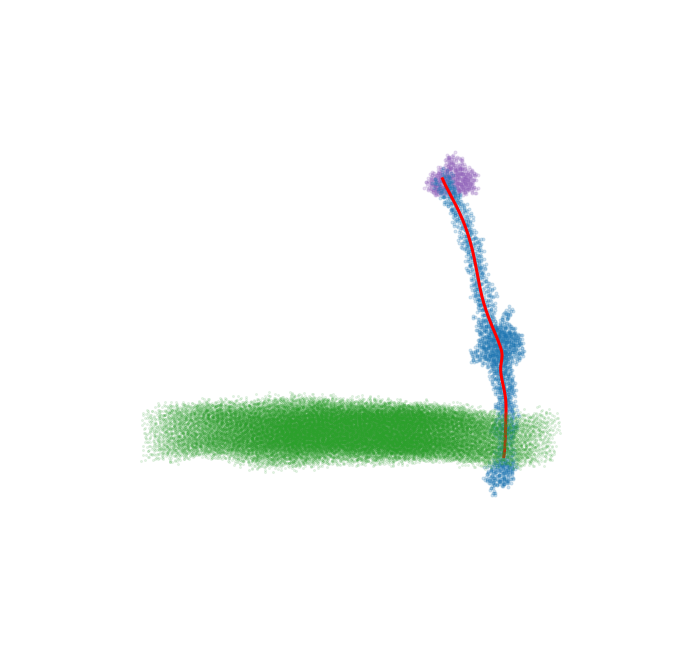

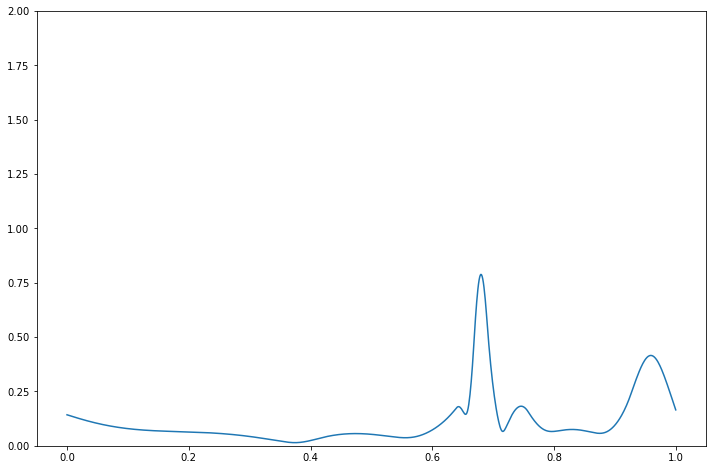

In [33]:
## read_traj(5)
# show one snapshot
poly = 4
trunc = 4
s_num = 1001
frame_num = 1901
plot_snapshot(frame_num)
s_ei, curvature_s, xyz_s = cal_curvature(frame_num, s_num)
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,s_num), curvature_s[:s_num])
plt.ylim([0,2])

In [ ]:
plt.plot(xyz_pro[frame_num,:,0],xyz_pro[frame_num,:,2],'bo',ms=1)

In [ ]:
xyz_s = np.array(xyz_s)


plt.plot(xyz_s[1,:],xyz_s[2,:])

In [ ]:
np.shape(xyz_s[1,:])

In [ ]:
s_num

In [ ]:
#s_num = 500
#frame_num = 1070
frame_num = 1005
s_ei, curvature_s, xyz_s = cal_curvature(frame_num, s_num)
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,s_num), curvature_s[:s_num])

In [ ]:
def find_residue_position(frame_num):
    
    x_inter, y_inter, z_inter = fit_curve(frame_num,s_num,trunc,poly)
    
    s_inter = np.zeros(np.shape(z_inter))
    s_inter[1:] = np.cumsum(np.sqrt((x_inter[1:]-x_inter[:-1])**2 + (y_inter[1:]-y_inter[:-1])**2 + (z_inter[1:]-z_inter[:-1])**2))
    
    position = np.zeros(1237-911)
    
    for i in range(1237-911):
        position[i] = s_inter[np.argmin(np.linalg.norm([x_inter-xyz_pro_fit_center[frame_num,i,0], y_inter-xyz_pro_fit_center[frame_num,i,1], z_inter-xyz_pro_fit_center[frame_num,i,2]],axis=0))]
    /
    return position

In [ ]:
#trunc = 1
#s_num = 200
#poly = 4

trunc = 9.0
s_num = 1001
frame_total = 2000
index_array = [1,2,3,4,5]
#index_array = [5]
curvature_t_5 =  np.zeros((len(index_array), frame_total, s_num))
s_t_5 = np.zeros(np.shape(curvature_t_5))
resi_s_5 = np.zeros((len(index_array),frame_total,1213-911))

for j in range(len(index_array)):

    frame_num = 0
    read_traj(index_array[j])

    curvature_t = np.zeros((frame_total, s_num))
    s_t = np.zeros(np.shape(curvature_t))
    #xyz_t = np.zeros((frame_total,3,s_num))

    s_temp, curvature_temp, xyz_temp = cal_curvature(frame_num, s_num)

    curvature_t[0,:] = curvature_temp[:s_num]
    s_t[0,:] = s_temp[:s_num]
    #xyz_t[0,:,:] = xyz_temp[:s_num]

    pos_temp = find_residue_position(frame_num)
    resi_s_5[j,0,:] = pos_temp[:1213-911]

    for i in range (np.shape(curvature_t)[0]-1):
        frame_num = frame_num + 1

        s_temp, curvature_temp, xyz_temp = cal_curvature(frame_num, s_num)
        s_t[i+1,:] = s_temp[:s_num]
        curvature_t[i+1,:] = curvature_temp[:s_num]
        #xyz_t[i+1,:,:] = xyz_temp[:s_num]
        pos_temp = find_residue_position(frame_num)
        resi_s_5[j,i+1,:] = pos_temp[:1213-911]

    curvature_t_5[j,:,:] = curvature_t
    s_t_5[j,:,:] = s_t


In [ ]:
frame_num

In [ ]:
np.save('curvature_trunc_%d.npy'%(int(trunc)),curvature_t)

In [ ]:
mean_curvature = np.average(curvature_t_5[0,:,:], axis=0)
fluc_curvature = np.std(curvature_t_5[0,:,:], axis=0)
plt.plot(np.linspace(0,1,s_num), mean_curvature)
plt.fill_between(np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)

In [ ]:
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,6))
for i in range(5):
    plt.subplot(5,1,i+1)
    mean_curvature = np.average(curvature_t_5[i,:,:], axis=0)
    fluc_curvature = np.std(curvature_t_5[i,:,:], axis=0)
    plt.plot(np.linspace(0,1,s_num), mean_curvature)
    plt.fill_between(np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)
    #plt.plot(np.linspace(0,1,s_num), fluc_curvature/np.sqrt(800))
    #plt.plot([0,1],[0.12,0.12],'b--',lw=2)
    plt.xlabel('relative arc length')
    plt.ylabel('curvature (nm$^-1$)')
    plt.ylim([0,5])
#plt.tight_layout()

In [ ]:
mean_curvature = np.average(curvature_t_5[:,:,:], axis=(0,1))
fluc_curvature = np.std(curvature_t_5[:,:,:], axis=(0,1))
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,s_num), mean_curvature)
plt.fill_between(np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)
#plt.plot(np.linspace(0,1,s_num), fluc_curvature/np.sqrt(800))
#plt.plot([0,1],[0.12,0.12],'b--',lw=2)
plt.xlabel('relative arc length')
plt.ylabel('curvature (nm$^-1$)')
plt.ylim([-0.1,1.0])

In [ ]:
np.shape(curvature_t_5)

In [ ]:
curvature_t_4 = curvature_t_5[[0,2,3,4],:,:]
mean_curvature = np.average(curvature_t_4, axis=(0,1))
fluc_curvature = np.std(curvature_t_4, axis=(0,1))
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,s_num), mean_curvature)
plt.fill_between(np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)
#plt.plot(np.linspace(0,1,s_num), fluc_curvature/np.sqrt(800))
#plt.plot([0,1],[0.12,0.12],'b--',lw=2)
plt.xlabel('relative arc length')
plt.ylabel('curvature (nm$^-1$)')
plt.ylim([-0.1,2.0])

In [ ]:
from scipy.optimize import curve_fit
def gaus3(x,*args):
    a1,x1,sigma1,a2,x2,sigma2,a3,x3,sigma3,c = args
    return a1*np.exp(-(x-x1)**2/(2*sigma1**2)) + a2*np.exp(-(x-x2)**2/(2*sigma2**2)) + a3*np.exp(-(x-x3)**2/(2*sigma3**2)) + c
param_bounds=([0,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1])
popt,pcov = curve_fit(gaus3,np.linspace(0,1,s_num),mean_curvature,p0=[0.4,0.65,0.05,0.2,0.85,0.05,0.2,0.95,0.05,0.1],maxfev = 2000000,bounds=param_bounds)
popt

In [ ]:
# mapping to the residues
x1 = popt[1]; w1 = popt[2]
x2 = popt[4]; w2 = popt[5]
x3 = popt[7]; w3 = popt[8]

mean_res_pos = np.mean(resi_s_3 / s_t_3[:,:,-1][:,:,np.newaxis], axis=(0,1))
fac = 1
range1 = (x1 - fac*np.sqrt(-np.log(3/4)*2*w1**2), x1 + fac*np.sqrt(-np.log(3/4)*2*w1**2))
range2 = (x2 - fac*np.sqrt(-np.log(3/4)*2*w2**2), x2 + fac*np.sqrt(-np.log(3/4)*2*w2**2))
range3 = (x3 - fac*np.sqrt(-np.log(3/4)*2*w3**2), x3 + fac*np.sqrt(-np.log(3/4)*2*w3**2))


hinge1_resi = np.where((mean_res_pos > range1[0])&(mean_res_pos < range1[1]))[0]+912
hinge2_resi = np.where((mean_res_pos > range2[0])&(mean_res_pos < range2[1]))[0]+912
hinge3_resi = np.where((mean_res_pos > range3[0])&(mean_res_pos < range3[1]))[0]+912


In [ ]:
mean_res_pos = np.mean(resi_s_5 / s_t_5[:,:,-1][:,:,np.newaxis], axis=(0,1))



In [ ]:
plt.plot(np.linspace(912,1213,302),mean_res_pos)

In [ ]:
print(range1,range2,range3)

In [ ]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(1-np.linspace(0,1,s_num), mean_curvature,linewidth=3)
plt.fill_between(1-np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)
plt.plot(1-np.linspace(0,1,s_num), gaus3(np.linspace(0,1,s_num), *popt),'--',linewidth=2)
plt.plot([1-range1[0],1-range1[0]],[-0.1,gaus3(range1[0], *popt)], 'r--')
plt.plot([1-range1[1],1-range1[1]],[-0.1,gaus3(range1[1], *popt)], 'r--')
plt.plot([1-range2[0],1-range2[0]],[-0.1,gaus3(range2[0], *popt)], 'r--')
plt.plot([1-range2[1],1-range2[1]],[-0.1,gaus3(range2[1], *popt)], 'r--')
plt.plot([1-range3[0],1-range3[0]],[-0.1,gaus3(range3[0], *popt)], 'r--')
plt.plot([1-range3[1],1-range3[1]],[-0.1,gaus3(range3[1], *popt)], 'r--')

plt.fill_between(np.linspace(1-range1[0],1-range1[1],s_num), np.zeros(s_num), gaus3(np.linspace(range1[0],range1[1],s_num),*popt),color = 'r',alpha = 0.4)
plt.fill_between(np.linspace(1-range2[0],1-range2[1],s_num), np.zeros(s_num), gaus3(np.linspace(range2[0],range2[1],s_num),*popt),color = 'r',alpha = 0.4)
plt.fill_between(np.linspace(1-range3[0],1-range3[1],s_num), np.zeros(s_num), gaus3(np.linspace(range3[0],range3[1],s_num),*popt),color = 'r',alpha = 0.4)

plt.xlim([0,1])
plt.ylim([0,0.8])

In [ ]:
hinge1_resi

In [ ]:
hinge2_resi

In [ ]:
hinge3_resi

In [ ]:
mean_curvature = np.average(curvature_t_3, axis=(0,1))
fluc_curvature = np.std(curvature_t_3, axis=(0,1))
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,s_num), mean_curvature)
plt.fill_between(np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)
#plt.plot(np.linspace(0,1,s_num), fluc_curvature/np.sqrt(800))
#plt.plot([0,1],[0.12,0.12],'b--',lw=2)
plt.xlabel('relative arc length')
plt.ylabel('curvature (nm$^-1$)')
plt.ylim([-0.1,1.0])

In [ ]:
np.sqrt(-np.log(1/2)*2*0.04**2)

In [ ]:
range1

In [ ]:
hinge1_resi

In [ ]:
hinge2_resi

In [ ]:
hinge3_resi

In [ ]:
resi_s_3 / s_t_3[:,-1]

In [ ]:
# calculate the persistence length
xyz_per = xyz_pro_fit_center[:,:1034-912,:]
contour_length_t = np.zeros((np.shape(xyz_per)[0],np.shape(xyz_per)[1]))
contour_length_t[:,1:] = np.cumsum(np.sqrt((xyz_per[:,1:,0]-xyz_per[:,:-1,0])**2 + (xyz_per[:,1:,1]-xyz_per[:,:-1,1])**2 + (xyz_per[:,1:,2]-xyz_per[:,:-1,2])**2), axis=1)

In [ ]:
import numpy.linalg as la
frame_start = 200
cos_theta_record = np.zeros((np.shape(countour_length_t)[1]-2) * (np.shape(countour_length_t)[0]-frame_start))
contour_record = np.zeros(np.shape(theta_record))
count = 0

for i in range(np.shape(countour_length_t)[0]-frame_start):
    v1 = xyz_per[i+frame_start,1,:] - xyz_per[i+frame_start,0,:]
    for j in range(np.shape(countour_length_t)[1]-2):
        contour_record[count] = contour_length_t[i+frame_start,j+1]
        v2 = xyz_per[i+frame_start,j+2,:] - xyz_per[i+frame_start,j+1,:]
        cos_theta_record[count] = np.dot(v1,v2)/la.norm(v1)/la.norm(v2)
        count = count + 1
            

In [ ]:
bin_number = 42
bins = np.linspace(0,21,bin_number+1)
cos_theta_bin = np.zeros((2,bin_number))
digitized = np.digitize(contour_record, bins)
for i in range(bin_number):
    cos_theta_bin[0,i] = np.mean(cos_theta_record[digitized==i])
    cos_theta_bin[0,i] = np.std(cos_theta_record[digitized==i])
bins_ave = (bins[1:] + bins[:-1])/2   

In [ ]:
plt.plot(bins_ave, -np.log(cos_theta_bin[0,:]))

In [ ]:
j